In [161]:
import torch
import numpy as np

In [162]:
w = torch.tensor([2.0], requires_grad=True)
b = torch.tensor([1.0], requires_grad=True)

# Input
x = torch.tensor([3.0])

In [163]:
#Forward pass
y_pred = w * x + b
print(f"y_pred: {y_pred.item()}")

y_pred: 7.0


In [164]:
#Loss
y_true = torch.tensor([10.0])
loss = (y_pred - y_true) ** 2
print(f"Loss: {loss.item()}")

Loss: 9.0


In [165]:
print(f"Avant backward: w.grad = {w.grad}")

Avant backward: w.grad = None


In [166]:
loss.backward()

In [167]:
print(f"Après backward: w.grad = {w.grad}")
print(f"Après backward: b.grad = {b.grad}")

Après backward: w.grad = tensor([-18.])
Après backward: b.grad = tensor([-6.])


In [168]:
# Update manuel des poids
learning_rate = 0.01
with torch.no_grad():  #Désactiver le tracking des gradients pour l'update w = w + alpha * w
    w -= learning_rate * w.grad
    b -= learning_rate * b.grad

In [169]:
print(f"Nouveaux poids: w = {w}, b = {b}")

Nouveaux poids: w = tensor([2.1800], requires_grad=True), b = tensor([1.0600], requires_grad=True)


In [170]:
#Réinitialiser les gradients (IMPORTANT !)
w.grad.zero_()
b.grad.zero_()
print(f"Après zero_: w.grad = {w.grad}, b.grad = {b.grad}")

Après zero_: w.grad = tensor([0.]), b.grad = tensor([0.])


In [171]:
import torch.nn as nn 

perceptron = nn.Linear(1, 1)

#Voir les poids initiaux
print(f"Poids: {perceptron.weight}")
print(f"Biais: {perceptron.bias}")

Poids: Parameter containing:
tensor([[-0.6666]], requires_grad=True)
Biais: Parameter containing:
tensor([0.2563], requires_grad=True)


In [172]:
# Forward
x = torch.tensor([[3.0]]) # Shape (batch_size, features)
print(f"input: {x}")
y_pred = perceptron(x)
print(y_pred)

input: tensor([[3.]])
tensor([[-1.7434]], grad_fn=<AddmmBackward0>)


In [173]:
# Loss
y_true = torch.tensor([[10.0]])
criterion = nn.MSELoss()
loss = criterion(y_pred, y_true)

In [174]:
loss

tensor(137.9067, grad_fn=<MseLossBackward0>)

In [175]:
#Backward
loss.backward()

In [176]:
print(f"Gradient du poids: {perceptron.weight.grad}")
print(f"Gradient du biais: {perceptron.bias.grad}")

Gradient du poids: tensor([[-70.4602]])
Gradient du biais: tensor([-23.4867])


In [177]:
import torch.optim as optim
optimizer = optim.SGD(perceptron.parameters(), lr=0.01)

In [178]:
optimizer.step()

In [179]:
print(f"Nouveaux poids: {perceptron.weight} {perceptron.bias}")

Nouveaux poids: Parameter containing:
tensor([[0.0381]], requires_grad=True) Parameter containing:
tensor([0.4912], requires_grad=True)


In [180]:
optimizer.zero_grad()

In [181]:
print(f"Gradient du poids: {perceptron.weight.grad}")
print(f"Gradient du biais: {perceptron.bias.grad}")

Gradient du poids: None
Gradient du biais: None


In [182]:
class SimpleNet(nn.Module) : 
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(6, 16, 3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
    
        self.fc1 = nn.Linear(16 * 7 * 7, 120)
        self.fc2 = nn.Linear(120, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool(x)

        x = self.conv2(x)
        x = self.relu(x)
        x = self.pool(x)

        x = x.view(-1, 16 * 7 * 7)

        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [183]:
model = SimpleNet()

In [184]:
model

SimpleNet(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=10, bias=True)
  (relu): ReLU()
)

In [185]:
x = torch.randn(1, 1, 28, 28)
y = torch.tensor([5.0])
y_pred = model(x)

criterion = nn.CrossEntropyLoss()
loss = nn.MSELoss()(y_pred, y)

loss.backward()

c:\Users\m0m0x\OneDrive\Bureau\A4-CDI\ia\.venv\Lib\site-packages\torch\nn\modules\loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 10])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [186]:
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Compose, Normalize
import matplotlib.pyplot as plt

In [ ]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=transform
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=transform
)

In [188]:
training_dataloader = DataLoader(training_data, batch_size=64, shuffle=True, pin_memory=True, num_workers=4)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=False, pin_memory=True, num_workers=4)

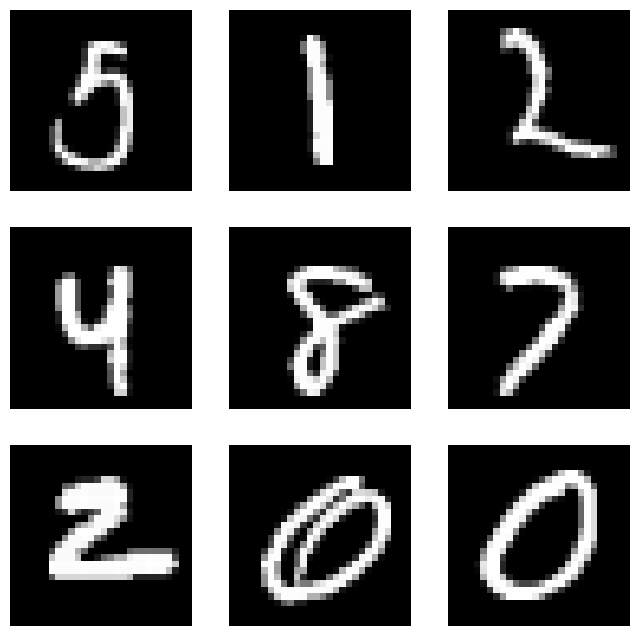

In [189]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [190]:
print(training_data.classes)
print(training_data.data.size())

['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']
torch.Size([60000, 28, 28])


In [191]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.fc = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.BatchNorm1d(512),        
            nn.ReLU(),
            nn.Dropout(0.2),

            nn.Linear(512, 128),
            nn.BatchNorm1d(128),       
            nn.ReLU(),
            nn.Dropout(0.2),
            
            nn.Linear(128, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.fc(x)
        return logits

In [192]:
print(torch.__version__)

2.6.0.dev20241112+cu121


In [193]:
device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"
print(f"Using device: {device}")
model = NeuralNetwork().to(device)
print(model)

Using device: cuda
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.2, inplace=False)
    (4): Linear(in_features=512, out_features=128, bias=True)
    (5): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.2, inplace=False)
    (8): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [194]:
model.eval()
X = torch.rand(1, 28, 28, device=device)
logits = model(X)

In [195]:
logits

tensor([[ 0.0553,  0.0187, -0.0342, -0.0067, -0.0616, -0.0608,  0.0860, -0.0399,
         -0.0912, -0.0385]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [196]:
pred_probab = nn.Softmax(dim=1)(logits)
pred_probab

tensor([[0.1074, 0.1035, 0.0982, 0.1009, 0.0955, 0.0956, 0.1107, 0.0976, 0.0927,
         0.0978]], device='cuda:0', grad_fn=<SoftmaxBackward0>)

In [197]:
y_pred = pred_probab.argmax(1)
y_pred

tensor([6], device='cuda:0')

In [198]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001)

In [199]:
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter()

In [200]:
def train(dataloader, model, loss_fn, optimizer, epoch_index, writer):
    size = len(dataloader.dataset)
    model.train()
    for batch_idx, batch_value in enumerate(dataloader):
        X, y = batch_value
        X, y = X.to(device), y.to(device)

        # Forward pass
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backward pass
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        global_step = epoch_index * len(dataloader) + batch_idx
        writer.add_scalar('Loss/train', loss.item(), global_step)

        if batch_idx % 100 == 0:
            loss, current = loss.item(), (batch_idx+1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5}]")


In [201]:
def test(dataloader, model, loss_fn, epoch_index, writer):
    size = len (dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss/=num_batches
    correct/=size

    writer.add_scalar('Accuracy/test', correct, epoch_index)
    writer.add_scalar('Loss/test', test_loss, epoch_index)
    
    print(f"Test Error: \n Accuaracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [202]:
# Assurez-vous que le modèle est bien sur le GPU avant de commencer
model.to(device)

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n---------------------")
    train(training_dataloader, model, loss_fn, optimizer, t, writer)
    test(test_dataloader, model, loss_fn, t, writer)
    
writer.flush()
writer.close()
print("Done!")

Epoch 1
---------------------
loss: 2.442024  [   64/60000]
loss: 0.260487  [ 6464/60000]
loss: 0.209515  [12864/60000]
loss: 0.160914  [19264/60000]
loss: 0.140762  [25664/60000]
loss: 0.160792  [32064/60000]
loss: 0.163237  [38464/60000]
loss: 0.301405  [44864/60000]
loss: 0.113815  [51264/60000]
loss: 0.198686  [57664/60000]
Test Error: 
 Accuaracy: 96.9%, Avg loss: 0.097881 

Epoch 2
---------------------
loss: 0.133526  [   64/60000]
loss: 0.091598  [ 6464/60000]
loss: 0.119151  [12864/60000]
loss: 0.112127  [19264/60000]
loss: 0.056525  [25664/60000]
loss: 0.183318  [32064/60000]
loss: 0.066220  [38464/60000]
loss: 0.116279  [44864/60000]
loss: 0.174885  [51264/60000]
loss: 0.032398  [57664/60000]
Test Error: 
 Accuaracy: 97.5%, Avg loss: 0.076834 

Epoch 3
---------------------
loss: 0.094847  [   64/60000]
loss: 0.188158  [ 6464/60000]
loss: 0.144115  [12864/60000]
loss: 0.095431  [19264/60000]
loss: 0.094196  [25664/60000]
loss: 0.099909  [32064/60000]
loss: 0.052367  [38464/6

In [203]:
model.to("cpu")
model.eval()

dummy_input = torch.randn(1, 1, 28, 28)

torch.onnx.export(
    model, 
    (dummy_input,), 
    "model.onnx", 
    input_names=['input'],       
    output_names=['output'],    
    dynamic_axes={'input': {0: 'batch_size'}, 'output': {0: 'batch_size'}}
)

print("Modèle exporté : model.onnx")

Modèle exporté : model.onnx
